In [39]:
import numpy as np, pandas as pd
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('basket_analysis2.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 15.7 KB


In [42]:
df.columns

Index(['Apple', 'Bread', 'Butter', 'Cheese', 'Corn', 'Dill', 'Eggs',
       'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Sugar',
       'Unicorn', 'Yogurt', 'chocolate'],
      dtype='object')

In [43]:
from mlxtend.frequent_patterns import apriori, association_rules  

In [44]:
apriori(df = df, min_support = 0.1, use_colnames=True)

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
164,0.101101,"(Ice cream, chocolate, Nutmeg)"
165,0.101101,"(Onion, Ice cream, chocolate)"
166,0.100100,"(Nutmeg, Milk, Kidney Beans)"
167,0.101101,"(Nutmeg, Yogurt, Kidney Beans)"


In [45]:
frequent_items = apriori(df, min_support = 0.1, use_colnames=True)
frequent_items.sort_values('support', ascending=False)

,support,itemsets
15,0.421421,(chocolate)
2,0.420420,(Butter)
14,0.420420,(Yogurt)
7,0.410410,(Ice cream)
12,0.409409,(Sugar)
...,...,...
136,0.100100,"(Sugar, Butter, Apple)"
155,0.100100,"(Cheese, Onion, Nutmeg)"
149,0.100100,"(Yogurt, Butter, Nutmeg)"
166,0.100100,"(Nutmeg, Milk, Kidney Beans)"


In [46]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
327,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,1.0,0.030628,1.101653,0.502813,0.213389,0.092273,0.414686
322,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,1.0,0.030628,1.407968,0.364570,0.213389,0.289757,0.414686
400,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,1.0,0.030231,1.450764,0.359474,0.206967,0.310708,0.420548
405,(chocolate),"(Unicorn, Dill)",0.421421,0.168168,0.101101,0.239905,1.426578,1.0,0.030231,1.094379,0.516821,0.206967,0.086240,0.420548
393,(chocolate),"(Dill, Milk)",0.421421,0.190190,0.114114,0.270784,1.423753,1.0,0.033964,1.110521,0.514418,0.229376,0.099522,0.435392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,(Dill),(Butter),0.398398,0.420420,0.175175,0.439698,1.045854,1.0,0.007680,1.034407,0.072879,0.272162,0.033262,0.428183
186,(Onion),(Kidney Beans),0.403403,0.408408,0.170170,0.421836,1.032878,1.0,0.005417,1.023225,0.053356,0.265211,0.022698,0.419251
187,(Kidney Beans),(Onion),0.408408,0.403403,0.170170,0.416667,1.032878,1.0,0.005417,1.022737,0.053807,0.265211,0.022232,0.419251
131,(Eggs),(Dill),0.384384,0.398398,0.157157,0.408854,1.026245,1.0,0.004019,1.017687,0.041541,0.251200,0.017380,0.401663


In [47]:
dropcols = ['representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski']
rules.drop(dropcols, axis=1, inplace=True)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift'],
      dtype='object')

In [48]:
# Calculate itemset size as total number of items in both antecedents and consequents
rules['itemset_size'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)

# Combine antecedents and consequents into a single string for labels
rules['itemset'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the association rules
rules.sort_values(by="lift", ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,itemset_size,itemset
327,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,3,"Onion -> Cheese, Dill"
322,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,3,"Cheese, Dill -> Onion"
400,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,3,"Unicorn, Dill -> chocolate"


In [49]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'itemset_size',
       'itemset'],
      dtype='object')

Visualize the results

Now after we get all the associations with their results, we can visualize the key metrics to better understand and interpret the data. Visualization helps in identifying patterns, trends, and insights that might not be immediately apparent from the raw data. Here are some visualizations we can create:

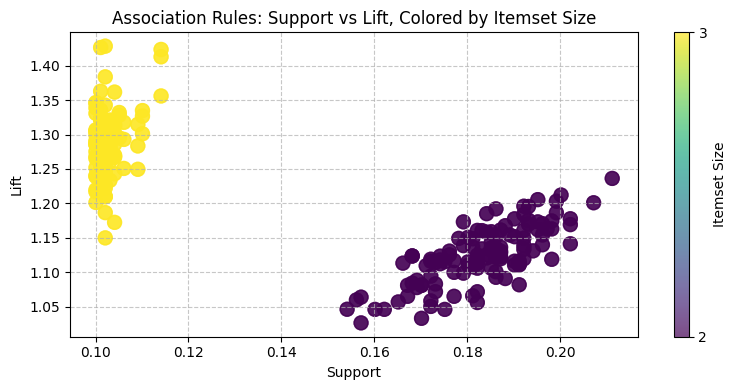

In [50]:
### Support vs Lift by Itemset Size
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    rules['support'],
    rules['lift'],
    c=rules['itemset_size'],  # Color based on itemset size
    cmap='viridis',  # Color map
    alpha=0.7,  # Slight transparency
    s=100  # Marker size
)

# Add colorbar with intervals of 1
cbar = plt.colorbar(scatter, label='Itemset Size')
cbar.set_ticks(list(range(2, rules['itemset_size'].max() + 1)))

# Labels and title
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Association Rules: Support vs Lift, Colored by Itemset Size')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
# Group by itemset size and calculate average support and lift
average_metrics = rules.groupby('itemset_size').agg({'support': 'mean', 'lift': 'mean'}).reset_index()
average_metrics

,itemset_size,support,lift
0,2,0.18304,1.124878
1,3,0.10280,1.286708


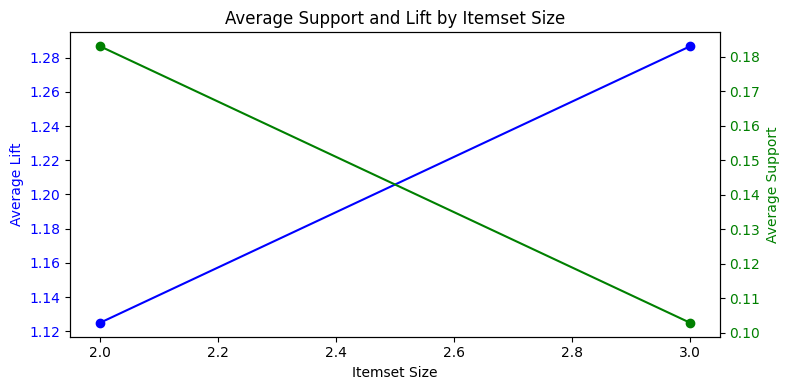

In [52]:
### Average support and Lift by Itemset Size

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot average lift on the primary y-axis
ax1.plot(average_metrics['itemset_size'], average_metrics['lift'], marker='o', color='b', label='Average Lift')
ax1.set_xlabel('Itemset Size')
ax1.set_ylabel('Average Lift', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis to plot average support
ax2 = ax1.twinx()
ax2.plot(average_metrics['itemset_size'], average_metrics['support'], marker='o', color='g', label='Average Support')
ax2.set_ylabel('Average Support', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding title and legend
plt.title('Average Support and Lift by Itemset Size')
fig.tight_layout()

# Show the plot
plt.show()

It's clearly appears that on average, as the itemset size increases:

- **Support decreases**: Larger itemsets (containing more items) are less frequent, as it's rarer for multiple specific items to be purchased together.

- **Lift increases**: Larger itemsets often have higher lift, indicating stronger associations among the items within those sets when they do occur.

Let's filtered the rules dataset to show the top point with the highest lift and support for each itemset size (cluster). This way, the business Decission will be more specific.

In [53]:
### Top itemset by Lift and Support

# Sort by itemset size, then by lift and support
rules_sorted = rules.sort_values(by=['itemset_size', 'lift', 'support'], ascending=[True, False, False])

# Group by itemset size and select the top itemset in each group
top_rules = rules_sorted.groupby('itemset_size').head(5).reset_index(drop=True)

# Display the filtered rules
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,itemset_size,itemset
0,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,2,Milk -> chocolate
1,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,2,chocolate -> Milk
2,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,2,Cheese -> Kidney Beans
3,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,2,Kidney Beans -> Cheese
4,(Onion),(Nutmeg),0.403403,0.401401,0.195195,0.483871,1.205454,2,Onion -> Nutmeg
5,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,3,"Cheese, Dill -> Onion"
6,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,3,"Onion -> Cheese, Dill"
7,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,3,"Unicorn, Dill -> chocolate"
8,(chocolate),"(Unicorn, Dill)",0.421421,0.168168,0.101101,0.239905,1.426578,3,"chocolate -> Unicorn, Dill"
9,(chocolate),"(Dill, Milk)",0.421421,0.190190,0.114114,0.270784,1.423753,3,"chocolate -> Dill, Milk"


Let's also visualize how the average confidence of association rules varies with the size of the itemsets.

In [ ]:
### Average Confidence by Itemset Size

# Group by itemset size and calculate average confidence
avg_confidence = rules.groupby('itemset_size')['confidence'].mean().reset_index()

# Sort the DataFrame by itemset size in descending order
avg_confidence = avg_confidence.sort_values(by='itemset_size', ascending=False)

# Create a line plot for Average Confidence by Itemset Size
plt.figure(figsize=(6, 4))
plt.plot(avg_confidence['itemset_size'], avg_confidence['confidence'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Itemset Size')
plt.ylabel('Average Confidence')
plt.title('Average Confidence by Itemset Size (Descending)')

# Reverse the x-axis
plt.gca().invert_xaxis()

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


The graph indicates that as the itemset size decreases, the average confidence tends to increase.

This makes sense because smaller itemsets are likely to have higher confidence levels, as the likelihood of a smaller set of items being bought together is higher compared to larger itemsets.